In [101]:
%load_ext autoreload
%autoreload 2

In [102]:
import sys
sys.path.append("..")

In [103]:
from optimus import Optimus

In [104]:
# Create optimus
op = Optimus()


                             ____        __  _                     
                            / __ \____  / /_(_)___ ___  __  _______
                           / / / / __ \/ __/ / __ `__ \/ / / / ___/
                          / /_/ / /_/ / /_/ / / / / / / /_/ (__  ) 
                          \____/ .___/\__/_/_/ /_/ /_/\__,_/____/  
                              /_/                                  
                              
Transform and Roll out...
Just checking that all necessary environments vars are present...
-----
PYSPARK_PYTHON=python
SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
JAVA_HOME=C:\Program Files\Java\jdk1.8.0_181
Pyarrow Installed
-----
Starting or getting SparkSession and SparkContext...
Optimus successfully imported. Have fun :).


In [97]:
from pyspark.sql.types import *
df = op.create.df(
    [
                ("words", "str", True),
                ("num", "int", True),
                ("animals", "str", True),
                ("thing", StringType(), True),
                ("two strings", StringType(), True),
                ("filter", StringType(), True),
                ("num 2", "string", True),
                ("date", "string", True),
                ("num 3", "float", True)
                
            ],[
                ("  I like     fish  ", 1, "dog", "&^%$#housé", "cat-car ", "a","1", "20150510", 3.0),
                ("    zombies", 2, "cat", "tv", "dog-tv", "b","2", "20160510", 3.0),
                ("simpsons   cat lady", 2, "frog", "table","eagle-tv-plus","1","3", "20170510", 4.0),
                (None, 3, "eagle", "glass", "lion-pc", "c","4", "20180510", 5.0)
    
            ]
            )

df.show()

+-------------------+---+-------+----------+-------------+------+-----+--------+-----+
|              words|num|animals|     thing|  two strings|filter|num 2|    date|num 3|
+-------------------+---+-------+----------+-------------+------+-----+--------+-----+
|  I like     fish  |  1|    dog|&^%$#housé|     cat-car |     a|    1|20150510|  3.0|
|            zombies|  2|    cat|        tv|       dog-tv|     b|    2|20160510|  3.0|
|simpsons   cat lady|  2|   frog|     table|eagle-tv-plus|     1|    3|20170510|  4.0|
|               null|  3|  eagle|     glass|      lion-pc|     c|    4|20180510|  5.0|
+-------------------+---+-------+----------+-------------+------+-----+--------+-----+



In [67]:
import numpy as np
import pandas as pd
data = np.array(['a','b','1','c'])
v = pd.Series(data)
v.head()


v.apply(func, args=("string",))

0     True
1     True
2    False
3     True
dtype: bool

In [ ]:
from optimus.functions import filter_row_by_data_type as asd

df.where(asd("filter", "string")).show()

In [ ]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col

df_stats = df.select(
    _mean(col('num')).alias('mean'),
    _stddev(col('num')).alias('std')
).collect()

mean = df_stats[0]['mean']
std = df_stats[0]['std']

In [ ]:
from pyspark.sql import functions as F
df.select(F.mean('num')).show()

In [5]:
#df =op.load.url("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/foo.csv")
df = op.read.json("100.json")

In [9]:
df =df.cols.drop("_id")

drop function took 14.934 ms


In [25]:
type(df.table("*",1))

<class 'dict'>


UndefinedError: 'str object' has no attribute 'items'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

[-0.77655876  0.8213969   0.62481172  0.17783361 -0.16774715 -0.6491101
  0.28162103  0.05515142 -0.18705438 -0.52066375 -0.66588094 -1.55642618
  0.25269827  0.83960701  0.94393363 -2.15381888 -1.12943982  1.5673323
  0.86032003 -1.20929831  0.0785139  -1.2942398  -0.75345374  0.2903344
  0.14818586  0.09845106 -1.25417258 -0.44785979 -0.47174024 -0.62172446
  1.72249009 -1.42499978  1.34913886 -0.74309715  0.1490734   0.52782992
 -1.27271297 -0.20462132 -0.23404023 -0.17436795  0.33504573 -0.34686184
  0.09127624 -0.28164593  1.72182587 -0.32999727  0.77036596  0.42545394
  1.11813852 -1.20739437 -0.21132303 -2.71589153 -0.76385703 -1.56857131
 -0.43047628  0.4510381  -1.06552805 -0.31343296  0.26484871  0.25107884
  0.45368632 -0.14197173  0.05706514 -1.19543426 -1.26313915  0.61593513
  2.59471676  0.35487728 -0.28587572  1.87107344 -0.45449563 -0.36644642
 -0.53538663 -1.20356069 -0.32339748  0.40675739  1.36328956  0.10986077
  0.21634204  0.25017687 -0.25997316 -0.56530128  0.68

C:\Users\argenisleon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


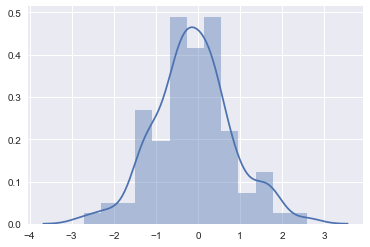

In [10]:
# https://seaborn.pydata.org/tutorial/distributions.html
sns.set(color_codes=True)

x = np.random.normal(size=100)

print(x)
sns.distplot(x);

     survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0     

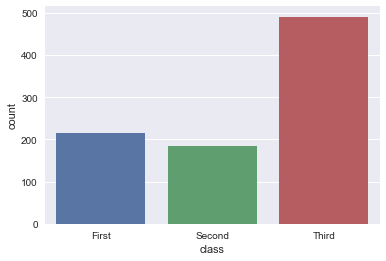

In [14]:
titanic = sns.load_dataset("titanic")
print(titanic)
ax = sns.countplot(x="class", data=titanic)

In [12]:
print(data)

             x         y
0     4.509613  1.913897
1    -0.316747 -0.247482
2     0.796468  1.322658
3     0.309928  0.640026
4    -2.480240 -0.849485
5    -1.219750  0.826660
6     0.771076 -0.822566
7     0.558148  1.555664
8     2.760030  1.769290
9     2.320541 -0.203014
10   -0.352386  0.786125
11    1.183542  0.815308
12    2.872623  3.917739
13    2.183988 -0.264496
14    0.060565  0.462022
15    0.022609 -2.125606
16    4.440716  0.675285
17   -1.172626 -0.647051
18   -0.244520  0.457907
19    0.022611 -0.877257
20    4.870595  2.566269
21    1.221235  0.747816
22   -0.373250 -1.775055
23   -0.180513  1.303164
24    1.388367 -0.482309
25    4.892105  1.921356
26    2.790934  1.512369
27    1.605586  1.592916
28    1.204800  1.067420
29   -2.681646  0.135331
...        ...       ...
1970  3.149951  0.118825
1971 -0.292576  0.512484
1972  0.592156  0.029440
1973  2.876204  0.111557
1974 -0.247509  3.441512
1975  2.072198 -0.259203
1976  2.768418  2.318871
1977  4.345371  2.872983


In [56]:
import matplotlib.pyplot as pl
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),rng.normal(loc=5, scale=2, size=1000)))
np.set_printoptions(threshold=np.nan)
#print(a)
#plt.hist(a, bins='auto')  # arguments are passed to np.histogram

plt.hist([1,2,3,4],weights= [1,1,1,1], bins = [1,2,3,4])  # arguments are passed to np.histogram

# Reference https://stackoverflow.com/questions/19139232/change-the-count-in-a-python-histogram-bin

#plt.title("Histogram with 'auto' bins")
#plt.show()

TypeError: hist() missing 1 required positional argument: 'x'

[  1   0   0   0   0   0   2   3   6  10   9  16  29  41  60  74 110 155
 197 267 296 369 447 466 499 559 610 624 619 635 610 549 490 439 399 312
 269 221 186 125 109  56  47  25  19  12  15   5   3   5] [ 89.19143868  93.12357833  97.05571797 100.98785762 104.91999726
 108.85213691 112.78427656 116.7164162  120.64855585 124.58069549
 128.51283514 132.44497478 136.37711443 140.30925408 144.24139372
 148.17353337 152.10567301 156.03781266 159.9699523  163.90209195
 167.8342316  171.76637124 175.69851089 179.63065053 183.56279018
 187.49492982 191.42706947 195.35920912 199.29134876 203.22348841
 207.15562805 211.0877677  215.01990734 218.95204699 222.88418664
 226.81632628 230.74846593 234.68060557 238.61274522 242.54488486
 246.47702451 250.40916416 254.3413038  258.27344345 262.20558309
 266.13772274 270.06986238 274.00200203 277.93414168 281.86628132
 285.79842097]
bins [ 89.19143868  93.12357833  97.05571797 100.98785762 104.91999726
 108.85213691 112.78427656 116.7164162  120.648555

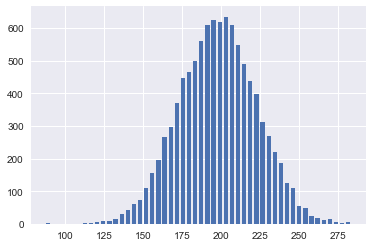

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
mu, sigma = 200, 25
x = mu + sigma*np.random.randn(10000)

# Create the histogram and normalize the counts to 1
hist, bins = np.histogram(x, bins = 50)
print(hist, bins)
max_val = max(hist)
#hist = [ float(n)/max_val for n in hist]

# Plot the resulting histogram
center = (bins[:-1]+bins[1:])/2
width = 0.7*(bins[1]-bins[0])
print("bins",bins)
print("center",center)

plt.bar(bins[:-1], hist, width = width)
plt.show()

In [92]:
bins[:-1]

array([109.76100309, 113.82287519, 117.88474729, 121.94661939,
       126.00849149, 130.07036359, 134.13223569, 138.1941078 ,
       142.2559799 , 146.317852  , 150.3797241 , 154.4415962 ,
       158.5034683 , 162.5653404 , 166.62721251, 170.68908461,
       174.75095671, 178.81282881, 182.87470091, 186.93657301,
       190.99844511, 195.06031721, 199.12218932, 203.18406142,
       207.24593352, 211.30780562, 215.36967772, 219.43154982,
       223.49342192, 227.55529402, 231.61716613, 235.67903823,
       239.74091033, 243.80278243, 247.86465453, 251.92652663,
       255.98839873, 260.05027084, 264.11214294, 268.17401504,
       272.23588714, 276.29775924, 280.35963134, 284.42150344,
       288.48337554, 292.54524765, 296.60711975, 300.66899185,
       304.73086395, 308.79273605])

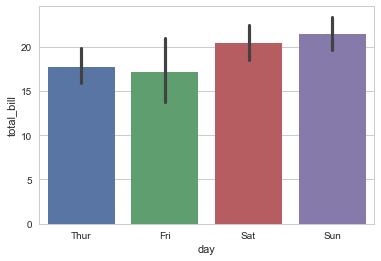

In [94]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

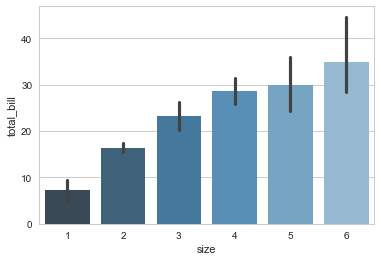

In [95]:
ax = sns.barplot("size", y="total_bill", data=tips, palette="Blues_d")

In [98]:
data

,x,y
0,4.509613,1.913897
1,-0.316747,-0.247482
2,0.796468,1.322658
3,0.309928,0.640026
4,-2.480240,-0.849485
5,-1.219750,0.826660
6,0.771076,-0.822566
7,0.558148,1.555664
8,2.760030,1.769290
9,2.320541,-0.203014


In [110]:
values_a = [('data',1),('data',2),('science',3),('hi',4)]
df_a = op.spark.createDataFrame(values_a,['name','v']).repartition(1)

In [109]:
from pyspark.sql.functions import pandas_udf, PandasUDFType

@pandas_udf(df_a.schema, PandasUDFType.GROUPED_MAP)
# Input/output are both a pandas.DataFrame
def plus_max(pdf):
    return pdf.assign(v=pdf.v + pdf.v.max())

df_a.show()
df_a.groupby('name').apply(plus_max).show()

+-------+---+
|   name|  v|
+-------+---+
|   data|  1|
|   data|  2|
|science|  3|
|     hi|  4|
+-------+---+

+-------+---+
|   name|  v|
+-------+---+
|science|  6|
|   data|  3|
|   data|  4|
|     hi|  8|
+-------+---+

